In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [45]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager  # Auto-downloads correct driver

options = Options()

#options.headless = True;

#options.add_argument("--headless")  # Optional: run in background

# WebDriver Manager automatically handles ChromeDriver download and path
service = Service(ChromeDriverManager().install())

driver = webdriver.Chrome(service=service, options=options)
driver.get("https://www.ambitionbox.com/list-of-companies?page=1")


In [46]:
soup = BeautifulSoup(driver.page_source, 'lxml')
driver.quit()


'<html class="nprogress-busy" lang="en" style="--vh: 5.14px; --dd-width: 351.4px;">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <link href="/assets/next/manifest.json" rel="manifest"/>\n  <style>\n   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}\n  </style>\n  <script src="/static/js/env-runtime.js">\n  </script>\n  <script>\n   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()\n  </script>\n  <title>\n   Companies in India | AmbitionBox\n  </title>\n  <meta content="2025 AmbitionBox" data-n-head="ssr" name="copyright"/>\n  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>\n  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>\n  <meta conten
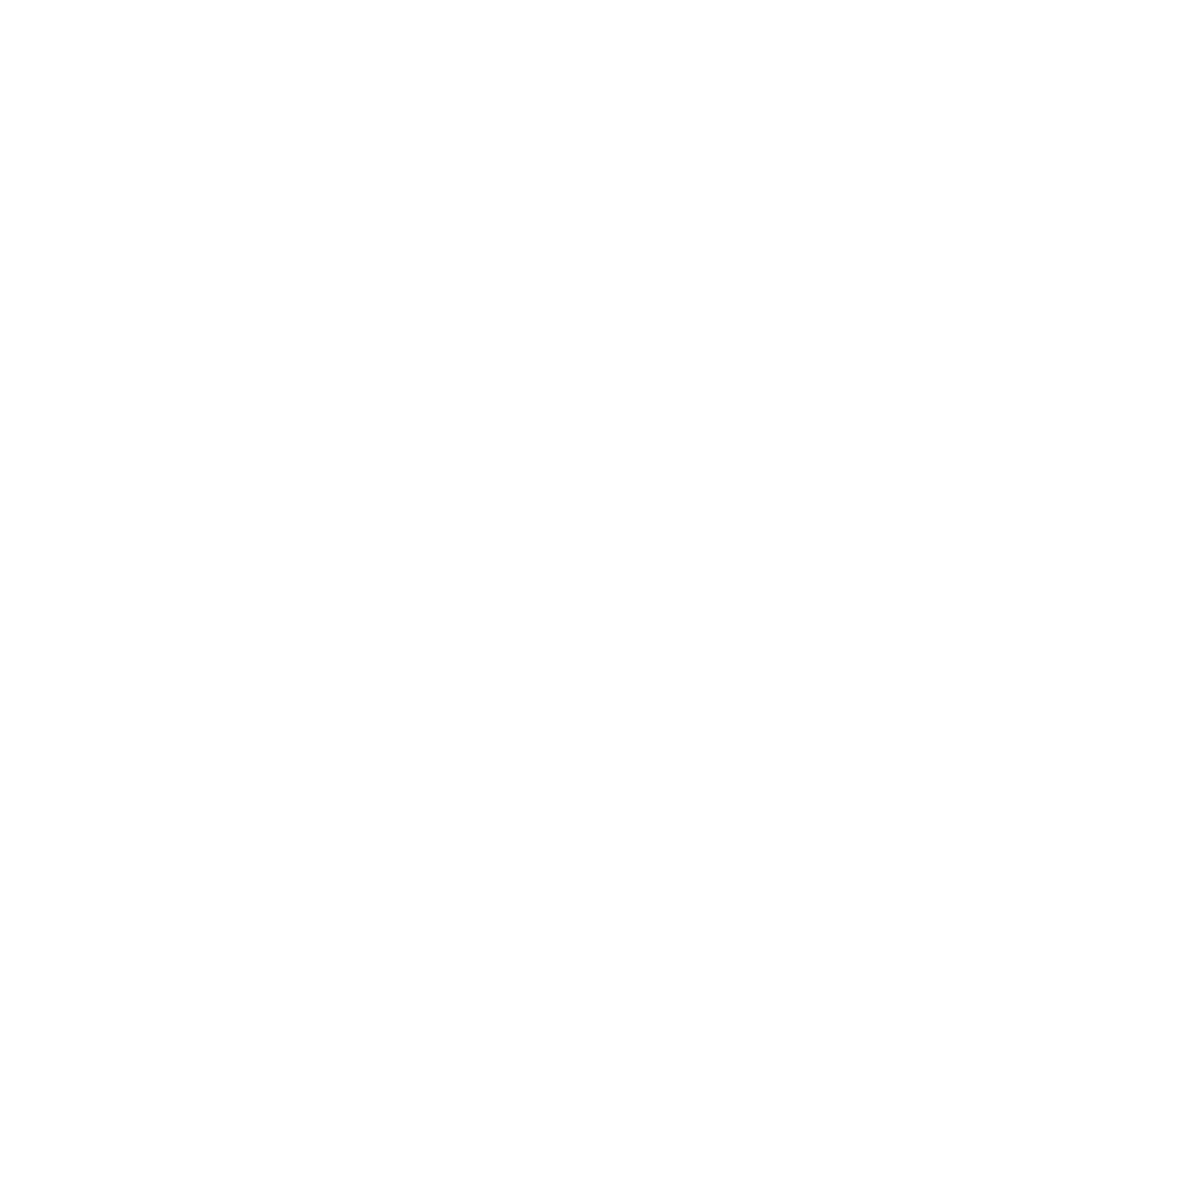

In [47]:
soup.prettify()

In [51]:
company = soup.find_all('div', class_='companyCardWrapper__companyDetails')

In [111]:
company_name = []
rating = []
reviews = []


for i in company:
    company_name.append(i.find('h2').text.strip())
    rating.append(i.find('div',class_='rating_text').text.strip())
    reviews.append(i.find('span',class_='companyCardWrapper__companyRatingCount').text.strip())
    

In [112]:
print(rating)

['3.7', '3.9', '3.7', '3.8', '3.7', '3.9', '3.6', '4.0', '3.5', '3.5', '3.8', '3.9', '3.8', '3.8', '4.1', '3.9', '4.6', '3.9', '4.0', '3.8']


In [113]:
print(reviews)

['(87.5k)', '(54.9k)', '(51.9k)', '(48.9k)', '(40.6k)', '(38.8k)', '(38.1k)', '(37.6k)', '(35.3k)', '(34.3k)', '(30.8k)', '(28.7k)', '(25.8k)', '(25k)', '(24.7k)', '(22.2k)', '(22k)', '(22k)', '(21.7k)', '(20.5k)']


In [114]:
d = {'company_name':company_name, 'rating':rating, 'reviews':reviews}

In [115]:
df = pd.DataFrame(d)

In [116]:
df

,company_name,rating,reviews
0,TCS,3.7,(87.5k)
1,Accenture,3.9,(54.9k)
2,Wipro,3.7,(51.9k)
3,Cognizant,3.8,(48.9k)
4,Capgemini,3.7,(40.6k)
5,HDFC Bank,3.9,(38.8k)
6,Infosys,3.6,(38.1k)
7,ICICI Bank,4.0,(37.6k)
8,HCLTech,3.5,(35.3k)
9,Tech Mahindra,3.5,(34.3k)


In [117]:
final = pd.DataFrame()
for i in range(1,11):
    url = f'https://www.ambitionbox.com/list-of-companies?page={i}'
    
    options = Options()

    options.headless = True;

    # WebDriver Manager automatically handles ChromeDriver download and path
    service = Service(ChromeDriverManager().install())

    driver = webdriver.Chrome(service=service, options=options)
    
    driver.get(url)
    
    soup = BeautifulSoup(driver.page_source, 'lxml')
    
    company = soup.find_all('div', class_='companyCardWrapper__companyDetails')
    
    company_name = []
    rating = []
    reviews = []


    for j in company:
        company_name.append(j.find('h2').text.strip())
        rating.append(j.find('div',class_='rating_text').text.strip())
        reviews.append(j.find('span',class_='companyCardWrapper__companyRatingCount').text.strip())

    d = {'company_name':company_name, 'rating':rating, 'reviews':reviews}
    df = pd.DataFrame(d)
    
    final = final.append(df)
    

    driver.quit()

In [120]:
final.shape

(200, 3)